In [123]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [124]:
#dataframe = pd.read_csv(r"indicadoresTipoPalabra_CLASS.csv")
#dataframe = pd.read_csv(r"indicadoresTipoPalabra_umbral1_CLASS.csv")
dataframe = pd.read_csv(r"indicadoresTipoPalabra_umbral1_CLASS.csv")
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,VERB_VERB,VERB_ADV,ADV_NOUN,ADV_ADJ,ADV_VERB,ADV_ADV,CLASS
0,3.660995,0.000000,1.243875,0.000000,0.908511,0.000000,0.000000,0.000000,0.293707,0.000000,0.351618,0.000000,0.000000,0.0,0.0,0.0,entailment
1,3.219189,0.222679,0.187945,0.000000,0.000000,1.224963,0.000000,0.000000,1.138384,0.000000,0.203158,0.000000,0.000000,0.0,0.0,0.0,entailment
2,3.281627,0.225920,0.742457,0.000000,1.351210,0.000000,0.894665,0.000000,0.199190,0.000000,0.607777,0.000000,0.000000,0.0,0.0,0.0,contradiction
3,2.461393,0.000000,0.561039,0.000000,1.731715,0.000000,0.000000,0.000000,0.845888,0.000000,1.699068,0.000000,0.000000,0.0,0.0,0.0,contradiction
4,1.860485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.504674,0.000000,0.232421,0.000000,0.357102,0.0,0.0,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.884689,0.571227,0.000000,0.000000,0.000000,1.233097,0.000000,0.000000,0.247773,0.235209,0.694806,0.000000,0.000000,0.0,0.0,0.0,entailment
96,1.887273,0.000000,0.000000,0.000000,0.917675,0.000000,0.000000,0.000000,0.000000,0.000000,0.719443,0.000000,0.000000,0.0,0.0,0.0,entailment
97,1.317129,0.000000,0.965588,0.000000,0.000000,0.000000,0.000000,0.000000,0.281120,0.000000,1.045653,0.000000,0.000000,0.0,0.0,0.0,contradiction
98,1.533278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525473,0.000000,0.320058,0.000000,0.000000,0.0,0.0,0.0,contradiction


In [125]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,VERB_VERB,VERB_ADV,ADV_NOUN,ADV_ADJ,ADV_VERB,ADV_ADV
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.339321,0.167602,0.360893,0.089380,0.590455,0.164717,0.077265,0.038643,0.418385,0.039352,0.422376,0.036583,0.044113,0.004942,0.026716,0.019079
std,1.130411,0.297415,0.487580,0.323304,0.689397,0.352279,0.303308,0.166581,0.465513,0.119461,0.477382,0.153294,0.137597,0.031786,0.118051,0.163007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.477958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.271634,0.000000,0.190060,0.000000,0.488398,0.000000,0.000000,0.000000,0.326972,0.000000,0.328384,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.003646,0.269384,0.623798,0.000000,0.939787,0.000000,0.000000,0.000000,0.542236,0.000000,0.600600,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.267500,1.379865,2.869047,2.170801,3.071738,1.427687,2.680772,0.964438,2.353116,0.588168,2.480648,1.029944,0.652995,0.280395,0.813687,1.604701


In [126]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


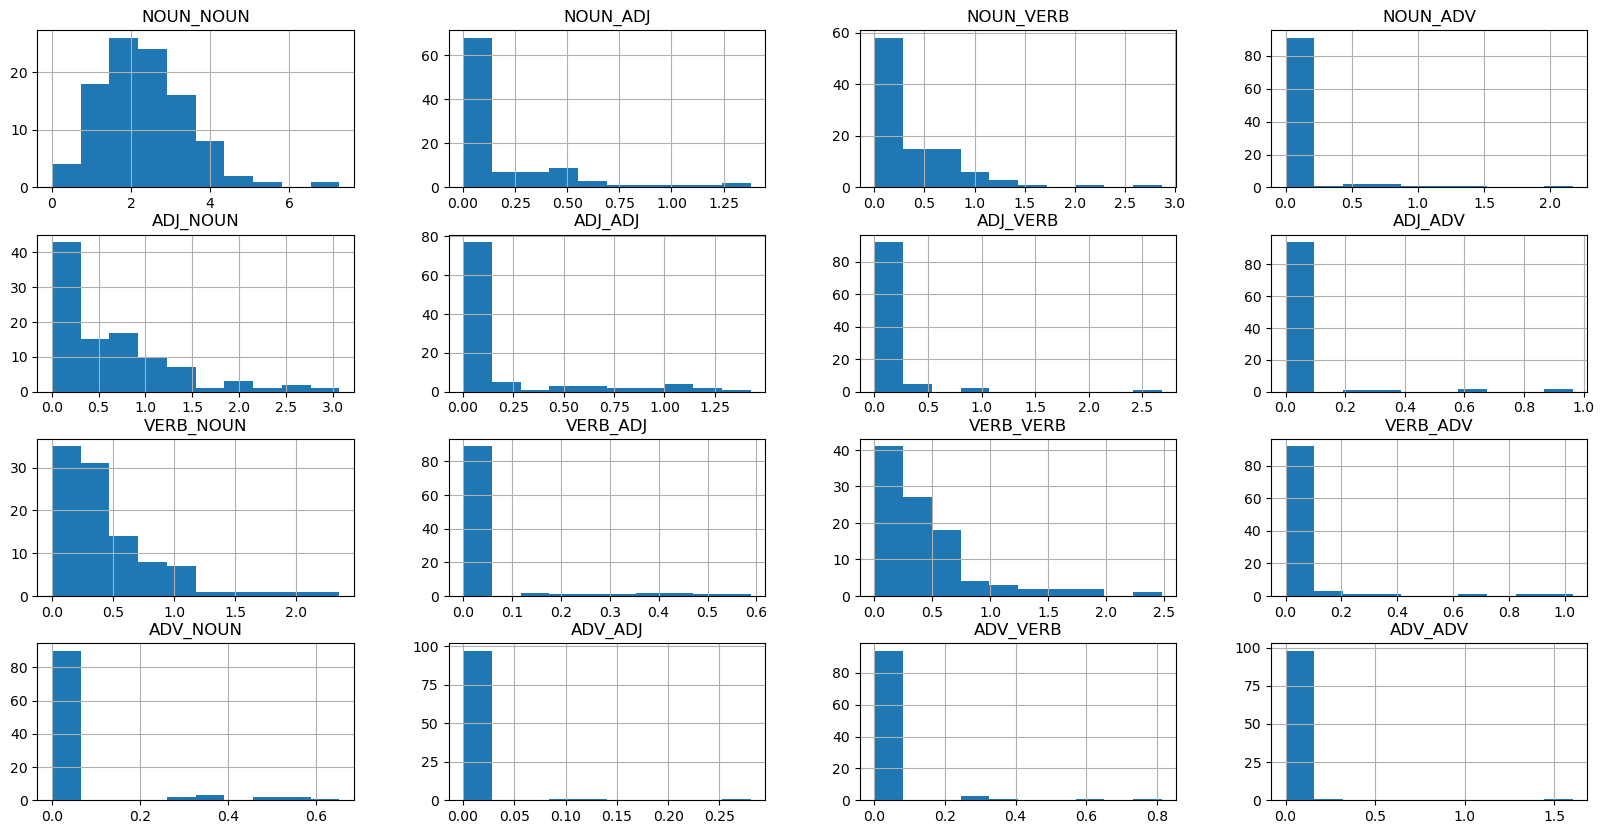

In [127]:
dataframe.hist(figsize=(20,10))
plt.show()

In [128]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [129]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [130]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_20860\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_20860\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 16)

In [131]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [132]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [133]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [134]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [135]:
model.decision_function(X)

array([[-0.11743052,  0.46759948, -0.35016896],
       [-0.30464814,  0.23458174,  0.0700664 ],
       [-0.19848792,  0.41342729, -0.21493937],
       [-0.05564714,  0.52865658, -0.47300944],
       [-0.14853779,  0.11159158,  0.03694621],
       [ 0.14897454,  0.39167957, -0.54065412],
       [-0.14634276,  0.17960771, -0.03326495],
       [-0.20954602,  0.17420616,  0.03533985],
       [-0.27070579,  0.08799881,  0.18270697],
       [ 0.15652836,  0.37096853, -0.52749689],
       [-0.36300497,  0.04717971,  0.31582525],
       [-0.16113022,  0.26820123, -0.10707101],
       [-0.27226703,  0.57111133, -0.2988443 ],
       [-0.15743023,  0.3481133 , -0.19068307],
       [-0.1444064 ,  0.25104987, -0.10664348],
       [-0.02382615,  0.08618818, -0.06236203],
       [-0.40525173,  1.09403465, -0.68878293],
       [-0.13943184,  0.04798264,  0.0914492 ],
       [-0.34531592,  0.15234275,  0.19297317],
       [ 0.02427793,  0.77576442, -0.80004234],
       [-0.14223251,  0.3647081 , -0.222

In [136]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [137]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [138]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [139]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  8 VERB_NOUN 5 ADJ_ADJ
Entailment  2 NOUN_VERB 1 NOUN_ADJ
Neutral  1 NOUN_ADJ 3 NOUN_ADV


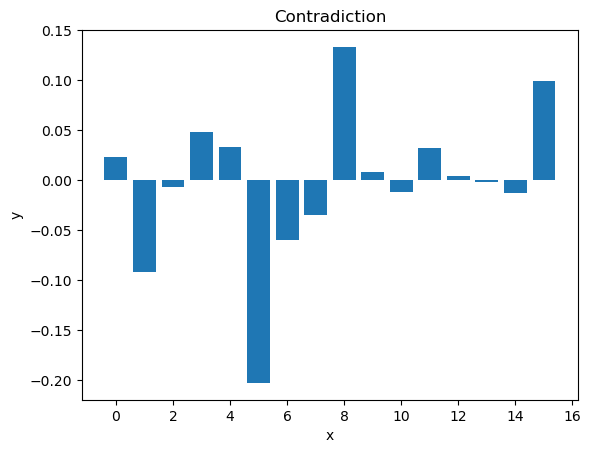

In [140]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,16,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

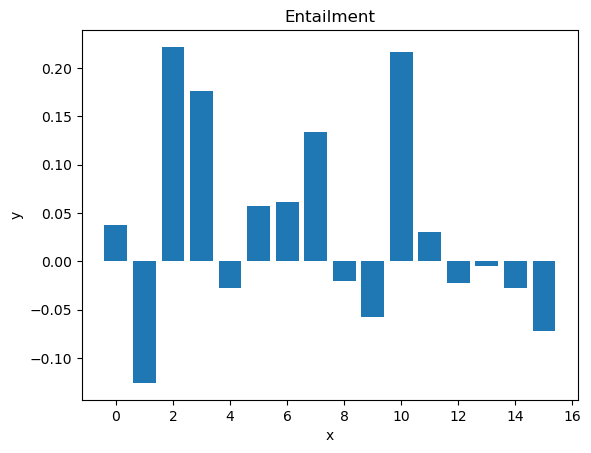

In [141]:
x_v = np.arange(0,16,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

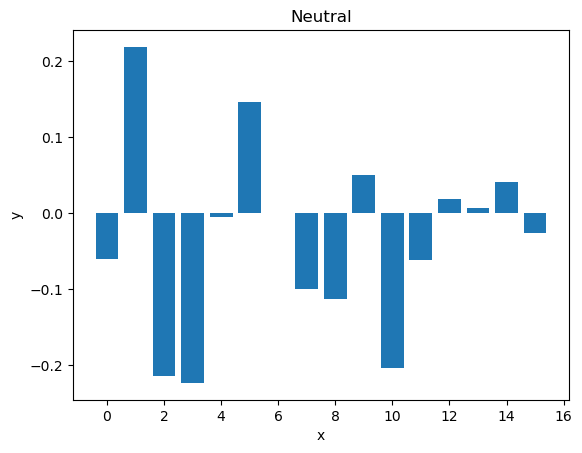

In [142]:
x_v = np.arange(0,16,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [143]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'neutral' 'neutral' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'neutral' 'neutral' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'contradiction' 'neutral' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'neutral' 'neutral'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'neutral' 'entailment' 'entailment' 'entailment' 'entailme

In [144]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [145]:
X

array([[3.66099477, 0.        , 1.24387543, ..., 0.        , 0.        ,
        0.        ],
       [3.21918873, 0.22267923, 0.1879449 , ..., 0.        , 0.        ,
        0.        ],
       [3.28162739, 0.22592035, 0.7424574 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.3171289 , 0.        , 0.96558818, ..., 0.        , 0.        ,
        0.        ],
       [1.53327845, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.46586753, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [146]:
model.score(X,y)

0.54

In [147]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [148]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.366667 (0.140984)


In [149]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.6


In [150]:
print(confusion_matrix(Y_validation, predictions))

[[0 1 1]
 [0 5 0]
 [0 2 1]]


In [151]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         2
   entailment       0.62      1.00      0.77         5
      neutral       0.50      0.33      0.40         3

     accuracy                           0.60        10
    macro avg       0.38      0.44      0.39        10
 weighted avg       0.46      0.60      0.50        10



c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ninja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
#X_new = pd.DataFrame()
#model.predict(X_new)